## TP3 - Machine Learning
#### Author: Adam HAISSOUBI-VOGIER
#### 4AFISA - GitHub Repo

## Première partie du TP : Découverte et analyse des données

In [ ]:
"""
Ce code a été rédigé sur Visual Studio Code version MacOS Silicon, et il est possible que des erreurs de chargement
puissent survenir lors du lancement sur un Jupyter NoteBook ou avec l'extension intégrant cet outil

La dernière partie du TP n'a pas pu être traitée (manque de temps), merci d'en tenir compte

Auteur: Adam HAISSOUBI-VOGIER (4AFISA)
Dernière modification: 19/03/2023 18:56:23

* Ce notebook est intégré et lié à un repository GitHub personnel, le lien est directement disponible à la première 
page du compte-rendu PDF.
** Tout le code implémenté a été commenté pour aider à la compréhension
"""
# première étape : on importe la fonction load_digits, disponible depuis la bibliothèque sklearn.datasets
from sklearn.datasets import load_digits
# on importe également la lib numpy, essentielle pour la manipulation et le stockage des données
import numpy as np
# matplotlib va nous permettre de créer des graphiques -> très utile !!
import matplotlib.pyplot as plt
# on importe aussi la lib sklearn pour réaliser des calculs et modèles pour l'apprentissage supervisé (ou non)
from sklearn.model_selection import train_test_split
#on importe la classe gérant le réseau neuronal multi-couche (MLPClassfier) depuis la lib sklearn
from sklearn.neural_network import MLPClassifier
# on importe la lib de typage (c'est plus joli)
from typing import Any, Union, Optional
# on charge le jeu de données digits -> variable globale
GLOBAL_DIGITS = load_digits()

# extraire les données d'images des chiffres manuscrits et les stocker dans la variable X
X = GLOBAL_DIGITS.data

# extraire les étiquettes (labels) correspondantes pour chaque image et les stocker dans la variable y
y = GLOBAL_DIGITS.target

In [66]:
# on importe la lib collections pour utiliser la classe Counter
# cette classe va nous permettre de compter les éléments d'une liste/dict 
# et leur récurrence
import collections
from collections import Counter


# on définit une loop qui va de 0 à 10 (il y a 10 chiffres manuscrits)
__loop_: Any = range(0,10)
tags_count_registry: Counter = collections.Counter(y)
print(tags_count_registry[i] for i in __loop_)
print(f'''
Data summary:
->X counter: {np.shape(X)}
->y counter: {np.shape(y)}
->Items count for tags: {np.unique(y)}
''')


(1797, 64)
(1797,)
[0 1 2 3 4 5 6 7 8 9]
178
182
177
183
181
182
181
179
174
180


<Figure size 640x480 with 0 Axes>

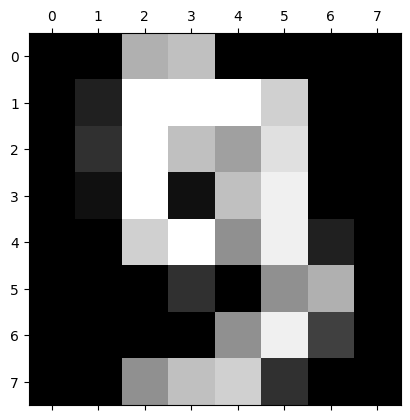

In [67]:
'''Affichage d'une image issue des données 
On aimerait affiche un numéro 7
-> Dispo dans le compte-rendu'''

# utilise plt alias de matplotlib
plt.gray()
# on affiche un numéro voulu récupéré depuis les données globales
plt.matshow(GLOBAL_DIGITS.images[7])
# on affiche l'image
plt.show()

In [68]:
# on divise les données en base d'apprentissage (70%) et de test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3,random_state=1)

## Deuxième partie du TP : Apprentissage de mon modèle

In [ ]:
# Ici, on va definir un learning rate initial, que l'on va utiliser directement dans notre futur
# modèle neuronal (ce sera un paramètre tout comme les 2 prochaines variables )
A: Union[int, float] = 0.01
#epoch
B: Union[int, float] = 100

# on définit des listes vides qui vont accueillir divers données : 
# -> les moyennes et std des calculs sur apprentissage et test
ACC_TRAINING_MEAN_LIST: list = [] # moyennes apprentissage
ACC_TRAINING_STD_LIST: list = [] # std apprentissage
ACC_TEST_MEAN_LIST: list = [] # moyennes test
ACC_TEST_STD_LIST: list = [] # std test

ACTIVATION: str = 'tanh'
SOLVER: str = 'adam'
LEARNING_RATE: str = 'adaptive'

__loop_ = range(1, 50)

# On veut tester les différentes valeurs pour C (défini par la var x)
# pour chaque x on teste dans MLPClassifier
# et pour chaque itération , on entraine plusieurs fois (7) le modèle
for x in __loop_ :
    #hidden layer size
    ACC_TRAIN, ACC_TEST = [], []
    __new_loop: Any = range(7)
    for y in __new_loop:
        # on crée le modèle neuronal multi-couche
        CLASSIFIER: MLPClassifier = MLPClassifier(hidden_layer_sizes=x, activation=ACTIVATION, solver=SOLVER, learning_rate_init=A, 
                    max_iter=B, learning_rate=LEARNING_RATE, shuffle=True, batch_size=len(y_train))
        CLASSIFIER.fit(X_train, y_train)
        # on calcule le score puis on l'enregistre dans la liste associée (train)
        ACC_TRAIN.append(CLASSIFIER.score(X_train, y_train))
        # on calcule le score puis on l'enregistre dans la liste associée (test)
        ACC_TEST.append(CLASSIFIER.score(X_test, y_test))
    # ensuite, pour chaque liste contenant les scores des précédentes itérations, on calcule mean + std
    # on enregistre les résultats finaux dans les listes associées
    ACC_TRAINING_MEAN_LIST.append(np.mean(ACC_TRAIN))
    ACC_TRAINING_STD_LIST.append(np.std(ACC_TRAIN))
    ACC_TEST_MEAN_LIST.append(np.mean(ACC_TEST))
    ACC_TEST_STD_LIST.append(np.std(ACC_TEST))

'''Tracé du graphique - matplotlib
On utilise les listes créées contenant les divers données pour tracer nos courbes
'''
plt.plot(ACC_TRAINING_MEAN_LIST)
plt.plot(ACC_TRAINING_STD_LIST)
plt.plot(ACC_TEST_MEAN_LIST)
plt.plot(ACC_TEST_STD_LIST)
# on ajoute une grille
plt.grid()
# on ajoute les labels sur X et Y (ord/abs)
plt.xlabel('VALEUR DE C')
plt.ylabel('SCORE ASSOCIÉ')
plt.show()

In [70]:
# d'après le graphiqye généré, on a une valeur optimale de C pour C=30
# par conséquent, on définit C à 30 ici
C: Union[int, float] = 30
LEARNING_RATE = 'constant'
IS_SHUFFLE: bool = True

# on instancie un deuxième classifieur pour effectuer nos calculs sur C
CLASSIFIER_2: MLPClassifier = MLPClassifier(hidden_layer_sizes=C, activation=ACTIVATION, solver=SOLVER, 
                             learning_rate_init=A,max_iter=B, learning_rate=LEARNING_RATE, shuffle=IS_SHUFFLE, 
                             batch_size=len(y_train))
CLASSIFIER_2.fit(X_train, y_train)

# on récupère la meilleure "loss" pour notre modèle définit sur le nombre de couche cachée optimum
print('BEST LOSS SCORE --> ', CLASSIFIER_2.best_loss_)
print(CLASSIFIER_2.score(X_train, y_train))
print(CLASSIFIER_2.score(X_test, y_test))

best loss =  0.07331221235333965
0.9872712808273667
0.9462962962962963


C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


## CROSS-VALIDATION

In [71]:
from sklearn.model_selection import validation_curve

C = np.arange(1, 50, 5)

train_scores, validation_scores = validation_curve(
        MLPClassifier(activation='tanh', solver='adam', batch_size=1,alpha=0, learning_rate='adaptive',early_stopping=True, validation_fraction=0.2), 
        X_train, y_train, param_name="hidden_layer_sizes",param_range=C,scoring="accuracy", n_jobs=2)

In [72]:
mean_train = []
mean_test = []
for i in range(len(train_scores)):
    mean_train.append(np.mean(train_scores[i]))

for i in range(len(validation_scores)):
    mean_test.append(np.mean(validation_scores[i]))

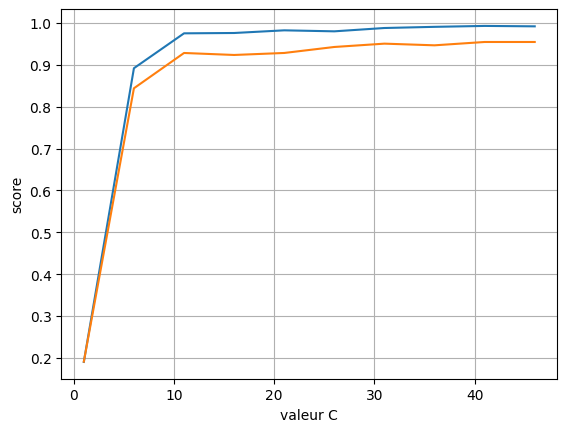

In [73]:
plt.plot(C, mean_train)
plt.plot(C, mean_test)
plt.grid()
plt.xlabel('valeur C')
plt.ylabel('score')
plt.show()

In [74]:
#réseau multi-couche
from sklearn.neural_network import MLPClassifier

#learning rate
A = 0.01
#epoch
B = 100
#hidden layer size
C = 20

clf5 = MLPClassifier(hidden_layer_sizes=C, activation='tanh', solver='adam', learning_rate_init=A,max_iter=B, learning_rate='constant', shuffle=True, batch_size=len(y_train))

clf5.fit(X_train, y_train)
print('best loss = ', clf5.best_loss_)
print(clf5.score(X_train, y_train))
print(clf5.score(X_test, y_test))

best loss =  0.08522404234091928
0.9856801909307876
0.9555555555555556


C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


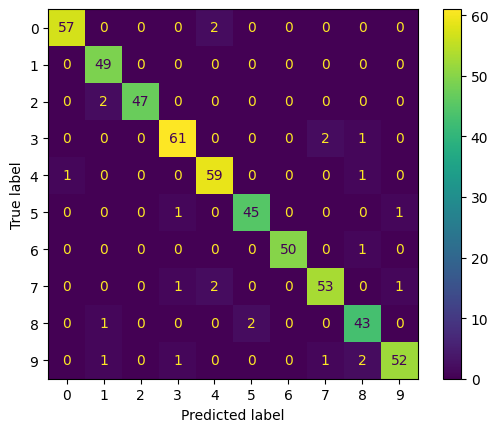

In [75]:
y_pred_test = clf5.predict(X_test)

#matrice de confusion
from sklearn import metrics
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)

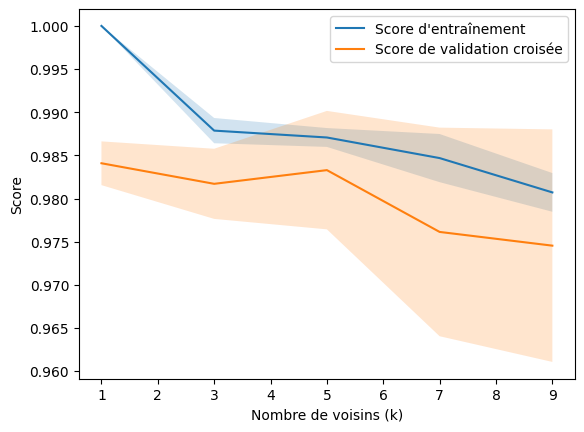

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

# Définir les valeurs à tester pour le paramètre k
param_range = [1,3,5,7,9]

# Instancier un classificateur KNN
knn = KNeighborsClassifier()

# Définir les plis pour la validation croisée
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Calculer les scores d'entraînement et de validation pour chaque valeur de k
train_scores, valid_scores = validation_curve(knn, X_train, y_train, param_name='n_neighbors', param_range=param_range, cv=kf)

# Calculer la moyenne et l'écart type des scores d'entraînement et de validation pour chaque valeur de k
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Afficher les résultats
import matplotlib.pyplot as plt

plt.plot(param_range, train_mean, label='Score d\'entraînement')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(param_range, valid_mean, label='Score de validation croisée')
plt.fill_between(param_range, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2)
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Score')
plt.legend()
plt.show()

## REJET

In [77]:
def argmax_reject_threshold(y, threshold):
    y_argmax = np.argmax(y, axis=1)
    y_masked = np.ma.array(y_argmax, mask=(np.amax(y, axis=1) < threshold))

    return y_masked.filled(-1)

def argmax_top2_reject_threshold(y, threshold):
    y_argmax = np.argmax(y, axis=1)
    y_top2 = np.sort(y, axis=1)[:,-1:-3:-1]
    y_masked = np.ma.array(y_argmax, mask=((y_top2[:,0] - y_top2[:,1]) < threshold))

    return y_masked.filled(-1)

C:\Users\Acer\AppData\Local\Temp\ipykernel_18968\1820789391.py:20: RuntimeWarning: invalid value encountered in double_scalars
  rejection_rate = matrix[0,-1] / np.sum(matrix[:,-1])
C:\Users\Acer\AppData\Local\Temp\ipykernel_18968\1820789391.py:20: RuntimeWarning: invalid value encountered in double_scalars
  rejection_rate = matrix[0,-1] / np.sum(matrix[:,-1])
C:\Users\Acer\AppData\Local\Temp\ipykernel_18968\1820789391.py:20: RuntimeWarning: invalid value encountered in double_scalars
  rejection_rate = matrix[0,-1] / np.sum(matrix[:,-1])
C:\Users\Acer\AppData\Local\Temp\ipykernel_18968\1820789391.py:20: RuntimeWarning: invalid value encountered in double_scalars
  rejection_rate = matrix[0,-1] / np.sum(matrix[:,-1])
C:\Users\Acer\AppData\Local\Temp\ipykernel_18968\1820789391.py:20: RuntimeWarning: invalid value encountered in double_scalars
  rejection_rate = matrix[0,-1] / np.sum(matrix[:,-1])
C:\Users\Acer\AppData\Local\Temp\ipykernel_18968\1820789391.py:20: RuntimeWarning: invalid

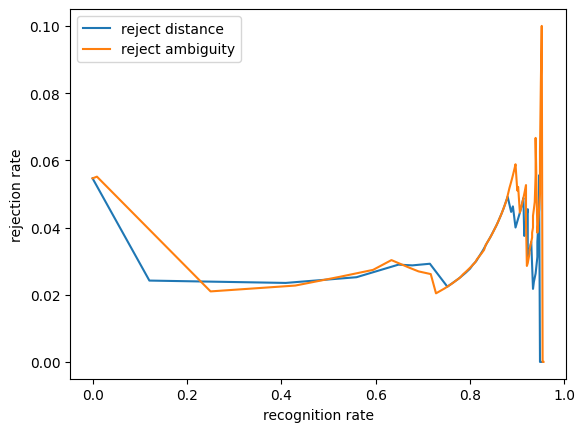

In [80]:
def confusion_matrix(y_true, y_pred):
    n_classes = len(np.unique(y_true))
    matrix = np.zeros((n_classes+1, n_classes+1))
    for i in range(n_classes):
        for j in range(n_classes):
            matrix[i, j] = np.sum((y_true == i) & (y_pred == j))
        matrix[i, -1] = np.sum(y_true == i) - np.sum(matrix[i, :-1])
        matrix[-1, i] = np.sum(y_pred == i) - np.sum(matrix[:-1, i])
    matrix[-1, -1] = np.sum((y_pred == -1) & (y_true != -1))
    return matrix

def evaluate_rejection_method(model, X, y_true, reject_func):
    thresholds = np.arange(0, 1.01, 0.01)
    recognition_rates = []
    rejection_rates = []
    for threshold in thresholds:
        y_pred = reject_func(model.predict_proba(X), threshold)
        matrix = confusion_matrix(y_true, y_pred)
        recognition_rate = np.sum(np.diag(matrix[:-1,:-1])) / np.sum(matrix[:-1,:])
        rejection_rate = matrix[0,-1] / np.sum(matrix[:,-1])
        recognition_rates.append(recognition_rate)
        rejection_rates.append(rejection_rate)
    return thresholds, recognition_rates, rejection_rates

thresholds, recognition_rates_reject_distance, rejection_rates_reject_distance = evaluate_rejection_method(clf5, X_test, y_test, argmax_reject_threshold)
thresholds, recognition_rates_reject_ambiguity, rejection_rates_reject_ambiguity = evaluate_rejection_method(clf5, X_test, y_test, argmax_top2_reject_threshold)
import matplotlib.pyplot as plt

plt.plot(recognition_rates_reject_distance, rejection_rates_reject_distance, label='reject distance')
plt.plot(recognition_rates_reject_ambiguity, rejection_rates_reject_ambiguity, label='reject ambiguity')
plt.xlabel('recognition rate')
plt.ylabel('rejection rate')
plt.legend()
plt.show()

## Cascade de classifieurs
